哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 

In [145]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_A = pd.read_csv('C:/Users/Sue Lin/ML100Days/Day41_RealEstate/A_lvr_land_B.csv')
df_F = pd.read_csv('C:/Users/Sue Lin/ML100Days/Day41_RealEstate/F_lvr_land_B.csv')
df_H = pd.read_csv('C:/Users/Sue Lin/ML100Days/Day41_RealEstate/H_lvr_land_B.csv')

In [146]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
df_A = df_A.drop([0])
df_F = df_F.drop([0])
df_H = df_H.drop([0])

In [147]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_A.insert(0, '城市', '台北市')
df_F.insert(0, '城市', '新北市')
df_H.insert(0, '城市', '桃園市')

In [148]:
#4. 將以上四份資料運用pd.concat()串接
df = pd.concat([df_A,df_F,df_H],axis=0)

In [134]:
display(df)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
1,中正區,房地(土地+建物)+車位,臨沂段二小段391~420地號,20.11,商,NaN,NaN,1090720,土地28建物1車位2,五層,...,2,有,無,93280000,358204,坡道平面,66.96,6000000,NaN,RPOOMLOKRHPFFBA28CB
2,內湖區,房地(土地+建物)+車位,潭美段五小段121~150地號,42.18,住,NaN,NaN,1080422,土地1建物1車位1,二層,...,2,有,無,34680000,204209,其他,21.79,1300000,預售屋雨遮不計價,RPUNMLRKRHPFFCA56CB
3,內湖區,房地(土地+建物)+車位,潭美段五小段121~150地號,42.18,住,NaN,NaN,1060903,土地1建物1車位1,三層,...,2,有,無,35730000,210633,其他,21.79,1300000,預售屋雨遮不計價,RPWNMLRKRHPFFCA76CB
4,內湖區,房地(土地+建物)+車位,潭美段五小段121~150地號,42.18,住,NaN,NaN,1080820,土地1建物1車位1,四層,...,2,有,無,35150000,207084,其他,21.79,1300000,預售屋雨遮不計價,RPXNMLRKRHPFFCA86CB
5,內湖區,房地(土地+建物)+車位,潭美段五小段121~150地號,42.18,住,NaN,NaN,1071223,土地1建物1車位1,五層,...,2,有,無,35860000,211428,其他,21.79,1300000,預售屋雨遮不計價,RPOOMLRKRHPFFCA68CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,中壢區,房地(土地+建物)+車位,仁祥段871~900地號,18.15,商,NaN,NaN,1081008,土地1建物1車位1,七層,...,2,有,無,8250000,51364,坡道平面,33.55,1300000,NaN,RPQOOLQKJIPFFBH88CB
684,中壢區,房地(土地+建物)+車位,仁祥段871~900地號,18.15,商,NaN,NaN,1080709,土地1建物1車位1,八層,...,2,有,無,7980000,50107,坡道平面,31.4,1200000,NaN,RPROOLQKJIPFFBH98CB
685,中壢區,房地(土地+建物)+車位,仁祥段871~900地號,18.15,商,NaN,NaN,1081029,土地1建物1車位1,九層,...,2,有,無,8300000,51733,坡道平面,33.55,1300000,NaN,RPSOOLQKJIPFFBH09CB
686,中壢區,房地(土地+建物)+車位,仁祥段871~900地號,21.64,商,NaN,NaN,1080409,土地1建物1車位1,十三層,...,2,有,無,9200000,49754,坡道平面,33.55,1200000,NaN,RPSOMLSKJIPFFBH09CB


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [ ]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [ ]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析


In [149]:
df=df.drop(['非都市土地使用分區','非都市土地使用編定','有無管理組織','編號'], axis=1)

In [150]:
df.describe

<bound method NDFrame.describe of       城市 鄉鎮市區          交易標的     土地區段位置建物區段門牌 土地移轉總面積平方公尺 都市土地使用分區    交易年月日  \
1    台北市  中正區  房地(土地+建物)+車位  臨沂段二小段391~420地號       20.11        商  1090720   
2    台北市  內湖區  房地(土地+建物)+車位  潭美段五小段121~150地號       42.18        住  1080422   
3    台北市  內湖區  房地(土地+建物)+車位  潭美段五小段121~150地號       42.18        住  1060903   
4    台北市  內湖區  房地(土地+建物)+車位  潭美段五小段121~150地號       42.18        住  1080820   
5    台北市  內湖區  房地(土地+建物)+車位  潭美段五小段121~150地號       42.18        住  1071223   
..   ...  ...           ...              ...         ...      ...      ...   
683  桃園市  中壢區  房地(土地+建物)+車位     仁祥段871~900地號       18.15        商  1081008   
684  桃園市  中壢區  房地(土地+建物)+車位     仁祥段871~900地號       18.15        商  1080709   
685  桃園市  中壢區  房地(土地+建物)+車位     仁祥段871~900地號       18.15        商  1081029   
686  桃園市  中壢區  房地(土地+建物)+車位     仁祥段871~900地號       21.64        商  1080409   
687  桃園市  中壢區  房地(土地+建物)+車位     仁祥段871~900地號       21.64        商  1080122   

          交易筆棟數 移轉層次 總樓層數  ..

In [ ]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())


In [151]:
df = df[df.都市土地使用分區 == '住']

In [153]:
df=df.drop(['建物現況格局-隔間'], axis=1)

In [155]:
df=df.drop(['主要建材','備註'], axis=1)

In [156]:
df = df[df.車位總價元 != '0']

In [160]:
print(df.isnull().any())
print(df['建築完成年月'].isnull().sum())

城市              False
鄉鎮市區            False
交易標的            False
土地區段位置建物區段門牌    False
土地移轉總面積平方公尺     False
都市土地使用分區        False
交易年月日           False
交易筆棟數           False
移轉層次            False
總樓層數            False
建物型態            False
主要用途            False
建築完成年月           True
建物移轉總面積平方公尺     False
建物現況格局-房        False
建物現況格局-廳        False
建物現況格局-衛        False
總價元             False
單價元平方公尺         False
車位類別            False
車位移轉總面積平方公尺     False
車位總價元           False
dtype: bool
1238


In [141]:
#df=df.dropna()

In [172]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df['土地移轉總面積平方公尺'] = df['土地移轉總面積平方公尺'].astype('float')
df['交易年月日'] = df['交易年月日'].astype('float')
#df['建築完成年月'] = df['建築完成年月'].astype('int')
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].astype('float')
df['建物現況格局-房'] = df['建物現況格局-房'].astype('int')
df['建物現況格局-廳'] = df['建物現況格局-廳'].astype('int')
df['建物現況格局-衛'] = df['建物現況格局-衛'].astype('int')
df['總價元'] = df['總價元'].astype('float')
df['單價元平方公尺'] = df['單價元平方公尺'].astype('float')
df['車位移轉總面積平方公尺'] = df['車位移轉總面積平方公尺'].astype('float')
df['車位總價元'] = df['車位總價元'].astype('float')


In [173]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 2 to 485
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   城市            1238 non-null   object 
 1   鄉鎮市區          1238 non-null   object 
 2   交易標的          1238 non-null   object 
 3   土地區段位置建物區段門牌  1238 non-null   object 
 4   土地移轉總面積平方公尺   1238 non-null   float64
 5   都市土地使用分區      1238 non-null   object 
 6   交易年月日         1238 non-null   float64
 7   交易筆棟數         1238 non-null   object 
 8   移轉層次          1238 non-null   object 
 9   總樓層數          1238 non-null   object 
 10  建物型態          1238 non-null   object 
 11  主要用途          1238 non-null   object 
 12  建築完成年月        0 non-null      object 
 13  建物移轉總面積平方公尺   1238 non-null   float64
 14  建物現況格局-房      1238 non-null   int32  
 15  建物現況格局-廳      1238 non-null   int32  
 16  建物現況格局-衛      1238 non-null   int32  
 17  總價元           1238 non-null   float64
 18  單價元平方公尺       1238 non-null  

In [178]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df1 = df[df.交易年月日 > 1090000]
df1 = df1.rename(columns = {'建物現況格局-房':'建物現況格局房'})
df1 = df1.rename(columns = {'建物現況格局-廳':'建物現況格局廳'})
df1 = df1.rename(columns = {'建物現況格局-衛':'建物現況格局衛'})
df1 = df1[df1.建物現況格局房 > 1 ]
df1 = df1[df1.建物現況格局房 < 5 ]
df1 = df1[df1.建物現況格局廳 > 1 ]
df1 = df1[df1.建物現況格局廳 < 3 ]

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [185]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df1['坪不含車位'] = (df1['建物移轉總面積平方公尺'] - df1['車位移轉總面積平方公尺'])*0.3025
df1['元不含車位'] = (df1['總價元'] - df1['車位總價元'])
df1['元坪不含車位'] = (df1['元不含車位'] / df1['坪不含車位'])

In [186]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df1.describe()


,土地移轉總面積平方公尺,交易年月日,建物移轉總面積平方公尺,建物現況格局房,建物現況格局廳,建物現況格局衛,總價元,單價元平方公尺,車位移轉總面積平方公尺,車位總價元,坪不含車位,元不含車位,元坪不含車位
count,362.000000,3.620000e+02,362.000000,362.000000,362.0,362.000000,3.620000e+02,362.000000,362.000000,3.620000e+02,362.000000,3.620000e+02,362.000000
mean,23.864613,1.090559e+06,152.897707,2.671271,2.0,1.820442,1.460091e+07,109835.212707,37.857514,1.718453e+06,34.799658,1.288246e+07,363091.522582
std,8.127706,2.339360e+02,34.132169,0.618015,0.0,0.616775,8.432311e+06,46065.774887,8.442503,4.795656e+05,9.290401,8.108005e+06,152283.553267
min,0.080000,1.090101e+06,89.310000,2.000000,2.0,1.000000,4.700000e+06,38982.000000,20.100000,1.100000e+06,17.015625,3.600000e+06,128866.555997
25%,17.730000,1.090416e+06,127.600000,2.000000,2.0,1.000000,9.757500e+06,78734.500000,36.180000,1.500000e+06,27.267350,8.177500e+06,260279.314135
50%,24.860000,1.090602e+06,147.860000,3.000000,2.0,2.000000,1.248000e+07,85566.500000,37.460000,1.600000e+06,34.910012,1.094000e+07,282863.919185
75%,28.970000,1.090719e+06,177.630000,3.000000,2.0,2.000000,1.595500e+07,130615.250000,40.090000,1.800000e+06,42.365125,1.419750e+07,431785.526574
max,46.150000,1.091020e+06,257.830000,4.000000,2.0,3.000000,5.500000e+07,283142.000000,91.040000,5.500000e+06,53.533425,4.970000e+07,936008.207492


In [ ]:
# 移除後再用.describe()觀察是否還有奇怪的資料?



# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [ ]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數

# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數


In [ ]:
# 假設用X，來預測時價登入總價 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
insomnia_mapping = {
           'Y': 1,
           'N': 0}
data['insomnia1'] = data['insomnia'].map(insomnia_mapping)
sex_mapping = {
           'Male': 1,
           'Female': 0}
data['sex1'] = data['sex'].map(sex_mapping)

x=data[['sex1','age', 'height','insomnia1']]
display(x)
y=data['weight']
x_new = SelectPercentile(chi2, percentile=50).fit_transform(x, y)
x_new.shape
display(x_new)

# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

c:\users\sue lin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22378 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:21

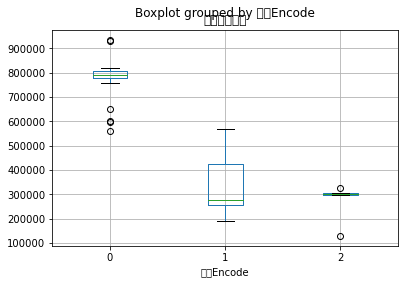

In [241]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import matplotlib.pyplot as plt
boxplot = df2.boxplot(column=['元坪不含車位'], by='城市Encode')
plt.show()

c:\users\sue lin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22378 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:21

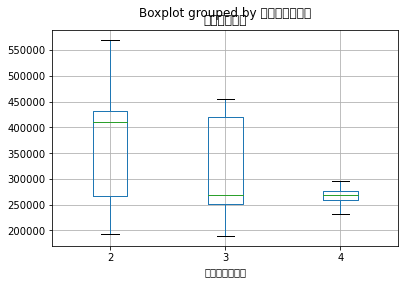

In [243]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。
#hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
boxplot = df4.boxplot(column=['元坪不含車位'], by='建物現況格局房')
plt.show()


c:\users\sue lin\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22378 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\sue lin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:21

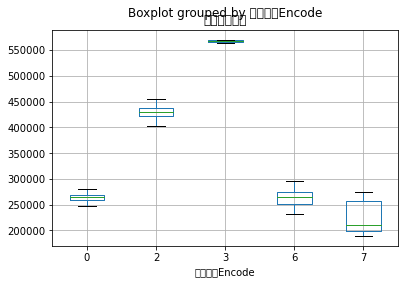

In [244]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
boxplot = df4.boxplot(column=['元坪不含車位'], by='鄉鎮市區Encode')
plt.show()

In [218]:
from sklearn.preprocessing import LabelEncoder
df3 = df1[['城市','鄉鎮市區']].apply(LabelEncoder().fit_transform)

In [220]:
df3 = df3.rename(columns = {'城市':'城市Encode'})
df3 = df3.rename(columns = {'鄉鎮市區':'鄉鎮市區Encode'})

In [223]:
df2 = pd.concat([df1,df3],axis=1)

In [227]:
pd.crosstab(df3.城市Encode, df3.鄉鎮市區Encode)

鄉鎮市區Encode,0,1,2,3,4,5,6,7
城市Encode,,,,,,,,
0,0,29,0,0,0,0,0,0
1,41,0,125,6,0,0,116,39
2,0,0,0,0,5,1,0,0


In [242]:
df4 = df2[df2.城市Encode == 1 ]
df4 

,城市,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,交易年月日,交易筆棟數,移轉層次,總樓層數,...,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,坪不含車位,元不含車位,元坪不含車位,城市Encode,鄉鎮市區Encode
12,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090423.0,土地1建物1車位1,十五層,22,...,12140000.0,171378.0,坡道平面,33.06,2500000.0,17.015625,9640000.0,566538.108356,1,3
13,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090516.0,土地1建物1車位1,十四層,22,...,12000000.0,170667.0,坡道平面,33.06,2400000.0,17.015625,9600000.0,564187.327824,1,3
14,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十六層,22,...,12100000.0,172444.0,坡道平面,33.06,2400000.0,17.015625,9700000.0,570064.279155,1,3
15,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十四層,22,...,12100000.0,170667.0,坡道平面,33.06,2500000.0,17.015625,9600000.0,564187.327824,1,3
16,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十六層,22,...,12100000.0,172444.0,坡道平面,33.06,2400000.0,17.015625,9700000.0,570064.279155,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,新北市,土城區,房地(土地+建物)+車位,員和段121~150地號,24.86,住,1091015.0,土地1建物1車位1,十九層,19,...,18730000.0,137234.0,坡道平面,37.46,2100000.0,36.656950,16630000.0,453665.675950,1,2
1139,新北市,土城區,房地(土地+建物)+車位,員和段121~150地號,29.61,住,1091016.0,土地1建物1車位1,十九層,19,...,21730000.0,136947.0,坡道平面,37.46,2000000.0,43.581175,19730000.0,452718.404219,1,2
1140,新北市,土城區,房地(土地+建物)+車位,員和段121~150地號,24.97,住,1091014.0,土地1建物1車位1,十四層,19,...,18100000.0,131460.0,坡道平面,37.46,2100000.0,36.817275,16000000.0,434578.604745,1,2
1141,新北市,土城區,房地(土地+建物)+車位,員和段121~150地號,24.97,住,1091020.0,土地1建物1車位1,十七層,19,...,18280000.0,132939.0,坡道平面,37.46,2100000.0,36.817275,16180000.0,439467.614048,1,2


In [245]:
#顯示所有行
pd.set_option('display.max_columns', None)
#顯示所有列
pd.set_option('display.max_rows', None)
#顯示行設定
pd.set_option('max_colwidth',100)

In [246]:
df4

,城市,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,建築完成年月,建物移轉總面積平方公尺,建物現況格局房,建物現況格局廳,建物現況格局衛,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,坪不含車位,元不含車位,元坪不含車位,城市Encode,鄉鎮市區Encode
12,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090423.0,土地1建物1車位1,十五層,22,住宅大樓(11層含以上有電梯),住家用,NaN,89.31,2,2,1,12140000.0,171378.0,坡道平面,33.06,2500000.0,17.015625,9640000.0,566538.108356,1,3
13,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090516.0,土地1建物1車位1,十四層,22,住宅大樓(11層含以上有電梯),住家用,NaN,89.31,2,2,1,12000000.0,170667.0,坡道平面,33.06,2400000.0,17.015625,9600000.0,564187.327824,1,3
14,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十六層,22,住宅大樓(11層含以上有電梯),住家用,NaN,89.31,2,2,1,12100000.0,172444.0,坡道平面,33.06,2400000.0,17.015625,9700000.0,570064.279155,1,3
15,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十四層,22,住宅大樓(11層含以上有電梯),住家用,NaN,89.31,2,2,1,12100000.0,170667.0,坡道平面,33.06,2500000.0,17.015625,9600000.0,564187.327824,1,3
16,新北市,新店區,房地(土地+建物)+車位,斯馨段31~60地號,12.25,住,1090531.0,土地1建物1車位1,十六層,22,住宅大樓(11層含以上有電梯),住家用,NaN,89.31,2,2,1,12100000.0,172444.0,坡道平面,33.06,2400000.0,17.015625,9700000.0,570064.279155,1,3
17,新北市,淡水區,房地(土地+建物)+車位,公司田段1~30地號,33.11,住,1090116.0,土地1建物1車位1,四層,26,住宅大樓(11層含以上有電梯),住家用,NaN,208.45,4,2,3,13300000.0,70385.0,坡道平面,40.09,1450000.0,50.928900,11850000.0,232677.320735,1,6
21,新北市,淡水區,房地(土地+建物)+車位,公司田段1~30地號,33.11,住,1090308.0,土地1建物1車位1,八層,26,住宅大樓(11層含以上有電梯),住家用,NaN,208.45,4,2,3,13700000.0,72761.0,坡道平面,40.09,1450000.0,50.928900,12250000.0,240531.407511,1,6
25,新北市,淡水區,房地(土地+建物)+車位,公司田段1~30地號,34.80,住,1090331.0,土地1建物1車位1,十九層,26,住宅大樓(11層含以上有電梯),住家用,NaN,216.91,4,2,3,15680000.0,81043.0,坡道平面,40.09,1350000.0,53.488050,14330000.0,267910.308938,1,6
26,新北市,淡水區,房地(土地+建物)+車位,公司田段1~30地號,34.80,住,1090518.0,土地1建物1車位1,十八層,26,住宅大樓(11層含以上有電梯),住家用,NaN,216.95,4,2,3,15680000.0,79894.0,坡道平面,40.09,1550000.0,53.500150,14130000.0,264111.409033,1,6
27,新北市,淡水區,房地(土地+建物)+車位,公司田段1~30地號,34.87,住,1090824.0,土地1建物1車位2,二十層,26,住宅大樓(11層含以上有電梯),住家用,NaN,257.00,4,2,3,17500000.0,81439.0,坡道平面,80.18,3100000.0,53.488050,14400000.0,269219.012471,1,6
